## Integrated Project 1

We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

## Initialization

In [1]:
!pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: matplotlib in /home/jovyan/.local/lib/python3.7/site-packages (3.5.1)


In [2]:
!pip install --upgrade pandas
# Loading all the libraries
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import datetime
import math
from scipy import stats as st

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.5)


## Load data

In [3]:
try:
    df_games = pd.read_csv('C:/Users/USER/Downloads/games.csv')
except:
    df_games = pd.read_csv('/datasets/games.csv')

## Prepare the data

Here we will prepare the data for analysis, taking the following steps:
1. Replace the column names (make them lowercase).
2. Convert data types
3. Deal with missing values
4. Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column

In [4]:
print(df_games.info())
df_games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


There are many missing values across the various rows and columns:

The rows with missing values in 'Name' and 'Genre' will be dropped.
The few missing values in 'Year_of_Release' will be hard/impossible to fill, might leave them as is.
There a lot of missing values in the scores and ratings, will have to look into it and figure out a reason behind it.

'Year_of_Release' will need to be converted to int.
'User_Score' will need to be converted to float

## Changing column names

In [5]:
df_games.columns = df_games.columns.str.lower()
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Treat missing values (where possible)

We will now look at the 2 missing values in 'Name' and 'Genre'. 
My guess is that it will be the same 2 rows.

In [6]:
print(df_games.query('name != name'))
#Now to get rid of it
df_games = df_games.query('name == name')
print(df_games.query('name != name').head())

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


Looking at missing values in 'year_of_release'

In [7]:
df_games.query('year_of_release != year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There doesnt seem to be any pattern to the missing values in 'year_of_release' (might be human error), and since we need to convert it to int we MUST fill in the missing values. we will fill them with 0, and in calculations we will ignore them as needed

In [8]:
df_games['year_of_release'].fillna(value=0, inplace=True)

Now we will look at the missing values in 'user_score'

In [9]:
df_games.query('user_score != user_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df_games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

There are many missing values in 'user_score', and a lot of rows with 'tbd' for value. Later on we will replace the 'tbd' with 0 so we can convert the column to float. For now we will just fill missing values with 0 and then turn them back to NaN later on

In [11]:
df_games['user_score'].fillna(value=0, inplace=True)

Now we will look at missing values in 'critic_score', the one with the most missing values (around 50%)

In [12]:
df_games.query('critic_score != critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,0,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,0,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,0,NaN


By looking at the table one may think that when 'critic_score' is missing then the 'user_score' and 'rating' are missing, but after looking at the .info of the table you can see that we have around 50% missing values in 'critic_score', and around 33% in the other two.
In our analysis we will focus mainly on sales, therefore we can afford to leave missing values in the scores. 

As for why the values are missing in the various scores and ratings, it seems completely random as it applies to games from a wide range of years, genres, platforms etc. Possibly human error.

## Changing data types

We will now proceed to convert the data type of 'year_of_release' to int, and the 'user_score' to float after replace the 'tbd' values in it with 0

In [13]:
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
df_games['user_score'].replace(to_replace = 'tbd', value = 0, inplace = True)
df_games['user_score'] = pd.to_numeric(df_games['user_score']).astype(float)

In [14]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Enriching Data

We will now calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column 'total_sales'

In [15]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN,31.38


## Analyze the Date

Looking at how many games were released in different years to see if the data for every period is significant.

<AxesSubplot:title={'center':'Games released per year'}, xlabel='year_of_release', ylabel='Total sales'>

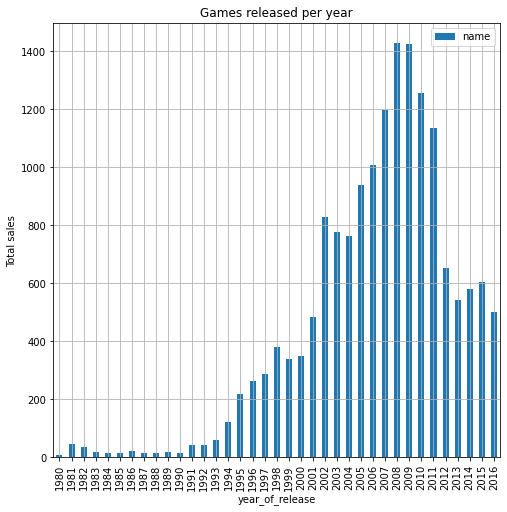

In [16]:
released_per_year = df_games.pivot_table(values = 'name', index = 'year_of_release', aggfunc = 'count')
released_per_year.query('year_of_release != 0').plot(kind = 'bar',
                                                     figsize = (8,8),
                                                     grid = True,
                                                     title = 'Games released per year',
                                                     ylabel = 'Total sales')

Game releases have been very slow up until the early 90s, then they started to climb up and peaked at 2008-2009, and then started decreasing. A possible reason would be the the length and cost of production of triple A games (releasing few but bigger games).

Looking at how sales varied from platform to platform. We will choose the platforms with the greatest total sales and build a distribution based on data for each year. We will find platforms that used to be popular but now have zero sales. We will find how long does it generally take for new platforms to appear and old ones to fade

<AxesSubplot:title={'center':'Total sales per platform'}, xlabel='platform', ylabel='Total sales'>

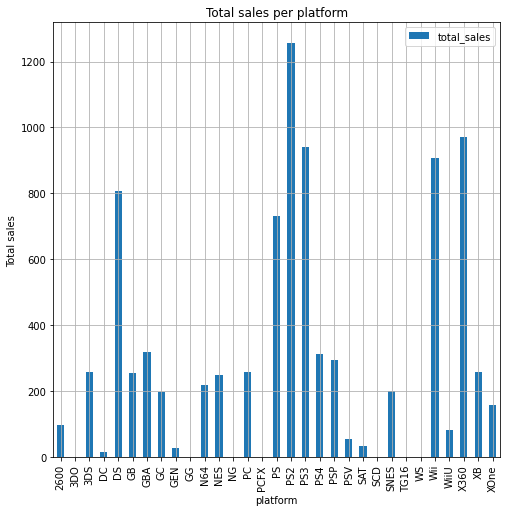

In [17]:
sales_per_platform = df_games.pivot_table(values = 'total_sales', index = 'platform', aggfunc = 'sum')
sales_per_platform.plot(kind = 'bar',figsize = (8,8), grid = True, ylabel = 'Total sales', title = 'Total sales per platform')

<AxesSubplot:title={'center':'Total sales per popular platforms'}, xlabel='platform'>

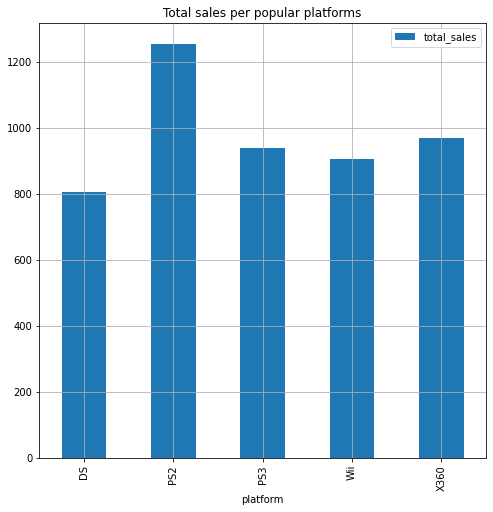

In [18]:
sales_top_platforms = sales_per_platform.query('total_sales > 800')
sales_top_platforms.plot(kind = 'bar',figsize = (8,8), grid = True, title = 'Total sales per popular platforms')

Here we see the top five platforms.
Now we will use them and see their total sales per year

<AxesSubplot:title={'center':'Sales per year by platform'}, xlabel='year_of_release', ylabel='Total Sales'>

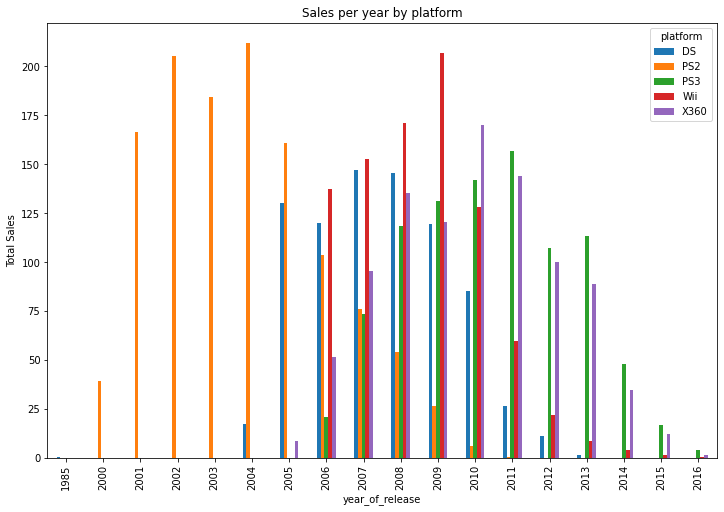

In [19]:
top_plats = ['DS', 'PS2', 'PS3', 'Wii', 'X360']
sales_top_platforms_yearly_sum = df_games.query('platform in @top_plats and year_of_release != 0').pivot_table(values = 'total_sales',
                                                                        index = 'year_of_release',
                                                                        columns = 'platform',
                                                                        aggfunc = 'sum')
sales_top_platforms_yearly_sum.plot(kind = 'bar', figsize = (12,8), ylabel = 'Total Sales', title = 'Sales per year by platform')

The most prominent platform of the early 2000s is PS2, that only started fading around 5 years after it's release when the competitors arrived, finally gone at 2010. The DS was an early peaker, faded at around 2013. The PS3 had a slow start due to transition from PS2 and the whopping success of the Wii, but managed to stay in the game until it's end at 2016. The Xbox360 went head-to-head with the PS3 in terms of sales, faded along with it at around 2016 after they started declining at 2011.

We will need to determine what period we should take data for. The previous data and answers should allow us to build a prognosis for 2017.
Activity in the console war started at around 2006 with the rise of Xbox360 and PS3 and the fading of the PS2, the last reigning king.
From the data gathered from the period of 2006-present we will try to chart a forecast for the newer generation of consoles (PS4, XboxONE, WiiU, 3DS, and the always-relevant PC) 

In [20]:
df_late = df_games.query('year_of_release >= 2013')
df_late.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       2233 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Let's see what platforms are still relevant in our new data frame and see which ones are still profitable.

In [21]:
df_late['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

<AxesSubplot:title={'center':'Sales per year by platform'}, xlabel='year_of_release', ylabel='Total Sales'>

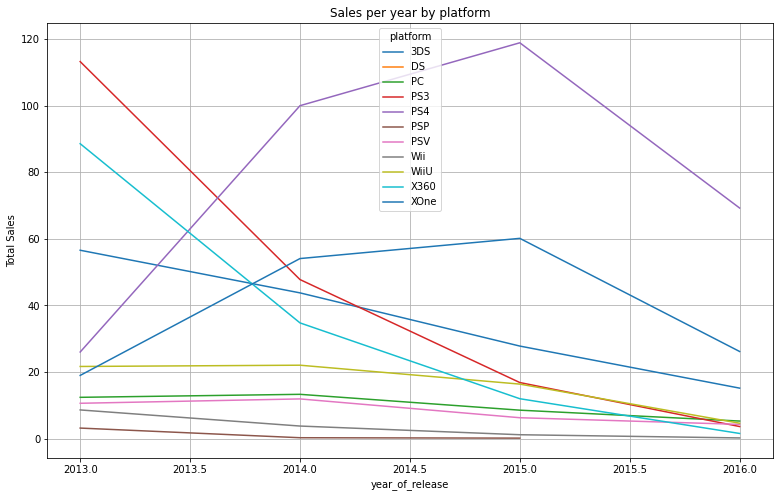

In [22]:
late_sales_top_platforms_yearly_sum = df_late.pivot_table(values = 'total_sales',
                                                                        index = 'year_of_release',
                                                                        columns = 'platform',
                                                                        aggfunc = 'sum')
late_sales_top_platforms_yearly_sum.plot(kind = 'line', grid = True, figsize = (13,8), ylabel = 'Total Sales', title = 'Sales per year by platform')

Many platforms faded into obscurity over the years, but the PS4 and XboxONE remain on top, with the 3DS not very far behind. We fill focus on those 3 as the representatives of the three big game companies and use them for future calculations of sales over the years

<AxesSubplot:>

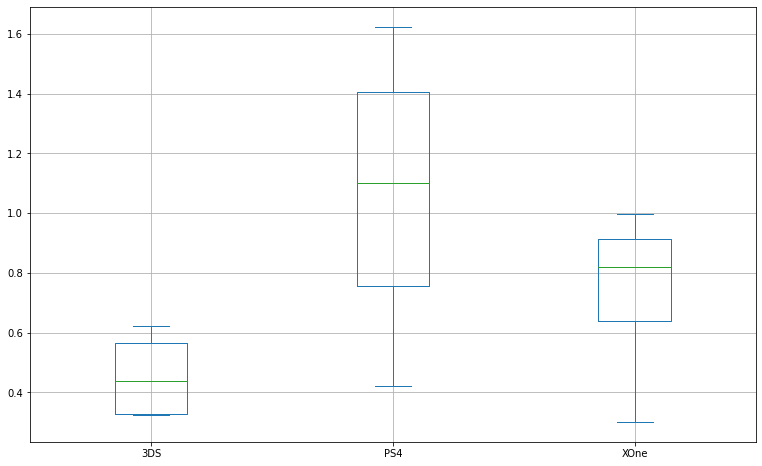

In [23]:
big3 = ['PS4','XOne','3DS']
big3_sales = df_late.query('platform in @big3').pivot_table(values = 'total_sales',
                                                            index = 'year_of_release',
                                                            columns = 'platform')
big3_sales.plot(kind = 'box',
                grid = True,
                figsize = (13,8))

Judgding from this, the PS4 is clearly in the lead in average lifetime sales, but there is a segment of it's games that earned less than the average games in XOne, so the race is still on.

Let's take a look at how user and professional reviews affect sales for one popular platform (We choose PS3). we will build a scatter plot and calculate the correlation between reviews and salesand then draw conclusions. 

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

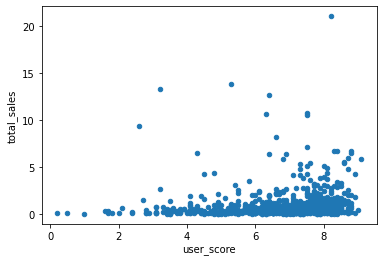

In [24]:
df_ps3 = df_games.query('platform == "PS3" and user_score != 0')
df_ps3.plot.scatter(x='user_score', y='total_sales')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

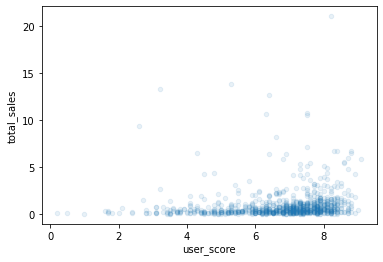

In [34]:
# Reviewer's code
df_ps3.plot.scatter(x='user_score', y='total_sales', alpha=0.1)

We are ignoring 'user_scores' of 0 because they were set by us (there were no 0s in 'user_score' before it).
There is a small rise in sales with the 'user_score', and we will now plot a correlation matrix to confirm it along with other factors

In [25]:
df_ps3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,0.041469,0.033480,0.022297,0.040331,0.046031,-0.036507,0.040083
na_sales,0.041469,1.000000,0.816030,0.367313,0.871531,0.450681,0.137144,0.937639
eu_sales,0.033480,0.816030,1.000000,0.404824,0.973867,0.376543,0.084722,0.959079
jp_sales,0.022297,0.367313,0.404824,1.000000,0.407136,0.195761,0.170002,0.483455
other_sales,0.040331,0.871531,0.973867,0.407136,1.000000,0.390825,0.110032,0.975696
critic_score,0.046031,0.450681,0.376543,0.195761,0.390825,1.000000,0.629005,0.427875
user_score,-0.036507,0.137144,0.084722,0.170002,0.110032,0.629005,1.000000,0.126691
total_sales,0.040083,0.937639,0.959079,0.483455,0.975696,0.427875,0.126691,1.000000


Surprisigly, 'user_score' barely factors into  'total_sales'. 
The 'critic_score' has a slightly bigger effect since these scores usually come really close to the release date, and this is what most customers tend to look at when trying to decide on a purchase.

Keeping our conclusions in mind, comparing the sales of the same games on other platforms. 

Disney Infinity                       3
Skylanders: Trap Team                 3
Young Justice: Legacy                 3
Just Dance 2015                       3
How to Train Your Dragon 2            3
                                     ..
Jikkyou Powerful Pro Baseball 2016    1
Deception IV: Blood Ties              1
Persona 5                             1
Samurai Warriors 4-II                 1
Samurai Warriors: Sanada Maru         1
Name: name, Length: 297, dtype: int64


<AxesSubplot:xlabel='platform', ylabel='Total sales'>

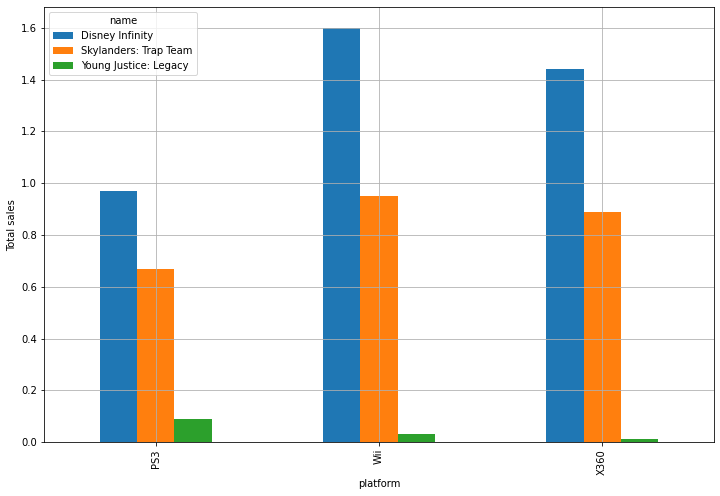

In [26]:
gen3_plats = ['PS3','Wii', 'X360']
df_dups = df_late[df_late['name'].duplicated(keep = False)].query('platform in @gen3_plats')
print(df_dups['name'].value_counts())

#We pick 3 games out of the list:
multiplat_games = ['Disney Infinity', 'Skylanders: Trap Team', 'Young Justice: Legacy']

sales_multiplat_slice = df_dups.query('name in @multiplat_games').pivot_table(values = 'total_sales',
                                                                        index = 'platform',
                                                                        columns = 'name',
                                                                        aggfunc = 'sum')
sales_multiplat_slice.plot(kind = 'bar', figsize = (12,8), grid = True, ylabel = 'Total sales')


Overall by the sample games we took, it looks like the same games sell much better on the Wii or X360 than on the PS3. The game 'Young Justice: Legacy' did sell better on the PS3, but not by alot. Might be related to the target playerbase of each console.

Taking a look at the general distribution of games by genre. What can we say about the most profitable genres? Let's try to generalize about genres with high and low sales

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

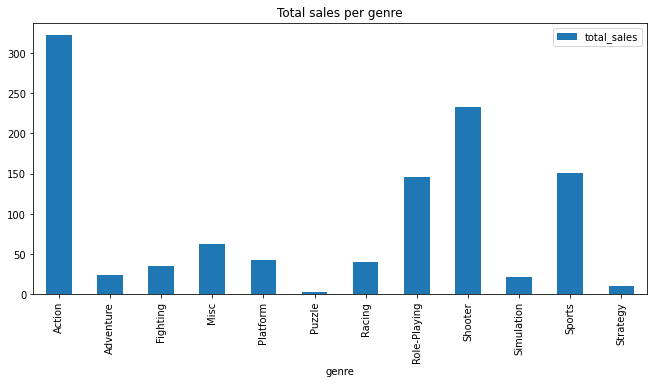

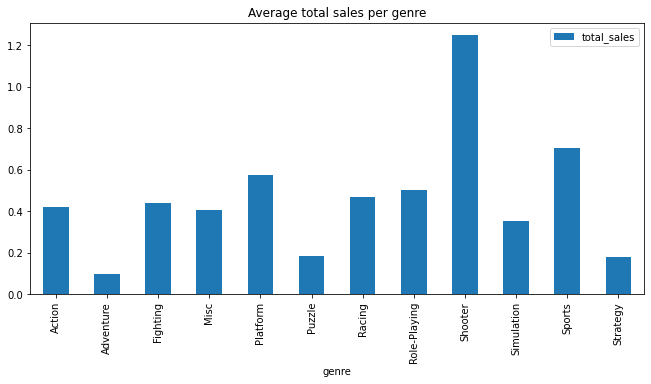

In [27]:
df_genre_mean = df_late.pivot_table(values = 'total_sales', index = 'genre', aggfunc = 'sum')
df_genre_mean.plot(kind = 'bar', figsize = (11,5), title = 'Total sales per genre')

df_genre_total = df_late.pivot_table(values = 'total_sales', index = 'genre', aggfunc = 'mean')
df_genre_total.plot(kind = 'bar', figsize = (11,5), title = 'Average total sales per genre')

df_late['genre'].value_counts()

There are alot more games in the Action genre, therefore it is logical that it will have higher income in total.
But on average it pales in comparison to the average total sales of Shooter games, where each game in popular franchises can become a huge success in a very short time, due to their name alone

## Profiling

In this section, for each region (NA, EU, JP), we will determine:
1. The top five platforms, and determine variations in their market shares from region to region.
2. The top five genres, and explain the difference.
3. We will answer the question, do ESRB ratings affect sales in individual regions?

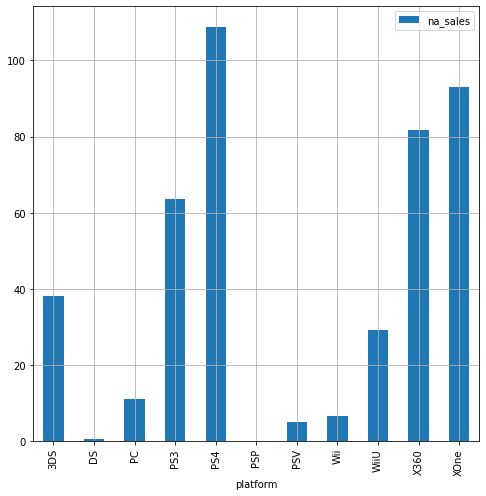

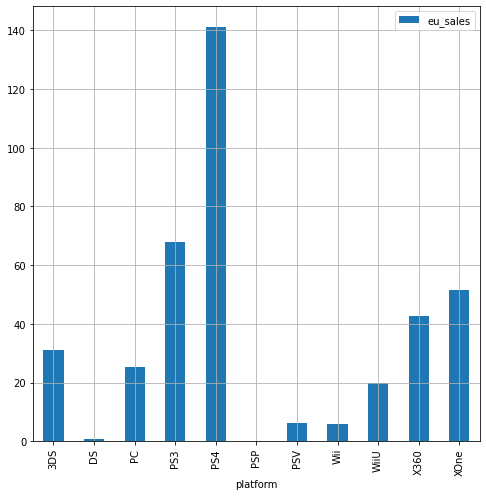

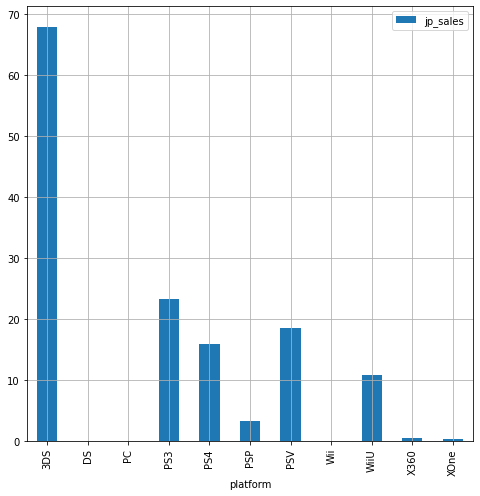

In [28]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_sales:
    plotted_table = df_late.pivot_table(values = region, index = 'platform', aggfunc = 'sum')
    plotted_table.plot(kind = 'bar',figsize = (8,8), grid = True)

#We will choose the top 5 platforms in each region, and check their market shares

<AxesSubplot:title={'center':'Top platform shares in JP'}, ylabel='jp_sales'>

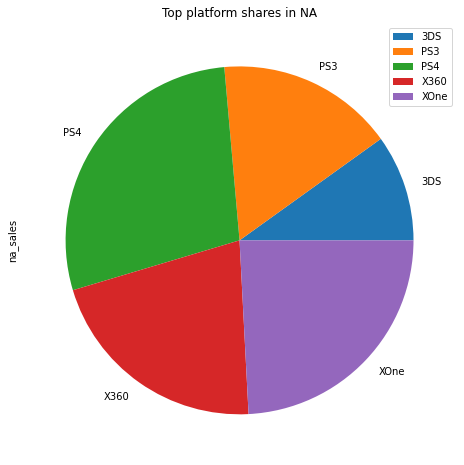

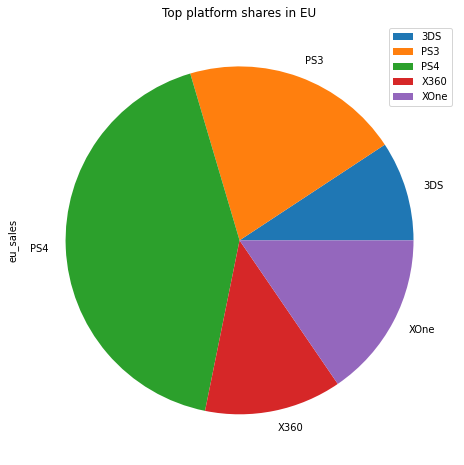

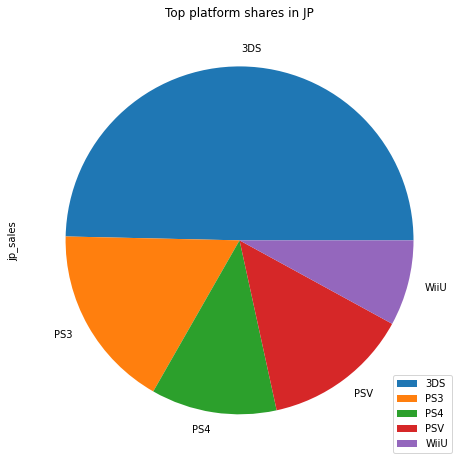

In [29]:
na_top5 = ['PS4', 'XOne', 'X360', 'PS3', '3DS']
na_table = df_late.pivot_table(values = 'na_sales', index = 'platform', aggfunc = 'sum').query('platform in @na_top5')
na_table.plot(kind = 'pie', y = 'na_sales', figsize = (8,8), title = 'Top platform shares in NA')

eu_top5 = ['PS4', 'XOne', 'X360', 'PS3', '3DS']
eu_table = df_late.pivot_table(values = 'eu_sales', index = 'platform', aggfunc = 'sum').query('platform in @eu_top5')
eu_table.plot(kind = 'pie', y = 'eu_sales', figsize = (8,8), title = 'Top platform shares in EU')

jp_top5 = ['PS4', 'PSV', 'WiiU', 'PS3', '3DS']
jp_table = df_late.pivot_table(values = 'jp_sales', index = 'platform', aggfunc = 'sum').query('platform in @jp_top5')
jp_table.plot(kind = 'pie', y = 'jp_sales', figsize = (8,8), title = 'Top platform shares in JP')

By looking at the pie charts we can reach various conclusions. 
1. In NA, the 2 heavy hitters (Sony and Microsft are pitting their flagship platforms against each other in very close contest; the PS4 sells a little better than the XOne, and below them the PS3 sells just a little better than the X360. After them is the 3DS, as it has a firm hold over the handheld market. 
2. In EU the PS4 is dominating the cntest, as the XOne and X360 combined can't hold a candle to the PS4's share of the market, not to mention the it's combined might with the PS3. Interestingly, the 3DS holds a similar share as in NA.
3. In JP on the other hand the market is different. the 3DS reigns supreme as it holds nearly 50% of the shares, dwarfing Sony's consoles the PS4, the PS3 and the surprising contender the PSV, which was known to have very little success worldwide, especially in the west. Even the WiiU, a famous commercial failure, makes an appearance in the top 5. All top 5 consoles in JP are Japanese in origin. Is the japanese audience technologically xenophobic?.

Our overall conclusion for this part is that in JP there is barely any presence of western consoles, while the west has a shared market of both western and japanese consoles. When marketing games to Japanese audiences it will be wise to not release them on any western platforms (XOne/X360).

Now we find the top five genres for each region, and explain the difference.

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64


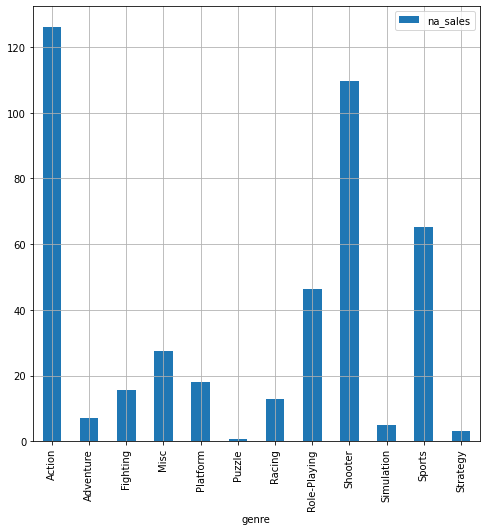

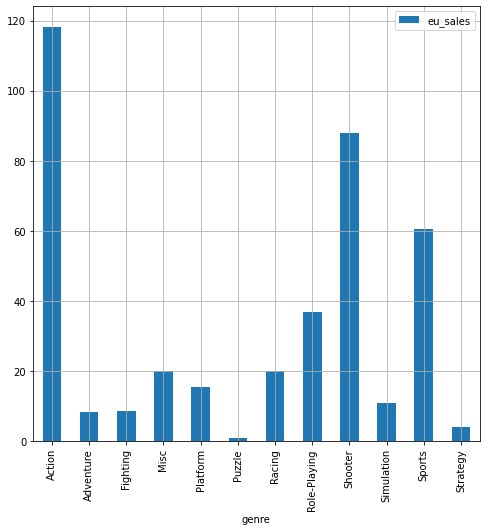

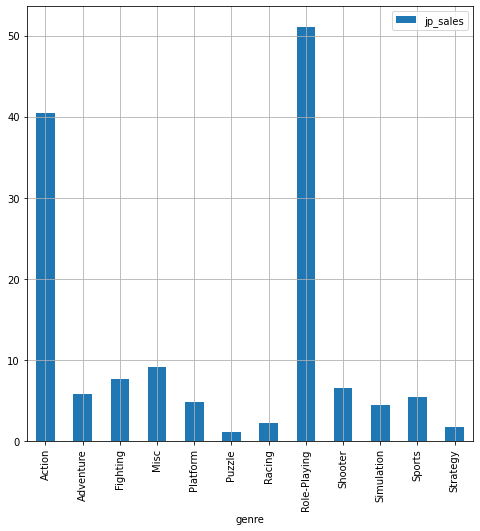

In [30]:
print(df_late['genre'].value_counts())
for region in region_sales:
    plotted_table = df_late.pivot_table(values = region, index = 'genre', aggfunc = 'sum')
    plotted_table.plot(kind = 'bar',figsize = (8,8), grid = True)

We can conclude that the NA and EU sales by genres show nearly identical picture of the leading genres. their top 5 genres in descending order: Action, Shooter, Sports, Role Playing, Misc.
The JP sales show a very different picture, with Role Playing games sweeping the board, followed by Action, and then Misc, Sports and Platform far below it.
In the west, Adventure games are surprisingly unsuccessful when considering they are 3rd in number after the many action games. 
The huge popularity of Roleplaying games in JP could be related to the strong market of JRPGs in JP, where many such games never even reach the west.

Now we will answer the question, do ESRB ratings affect sales in each of the three regions?

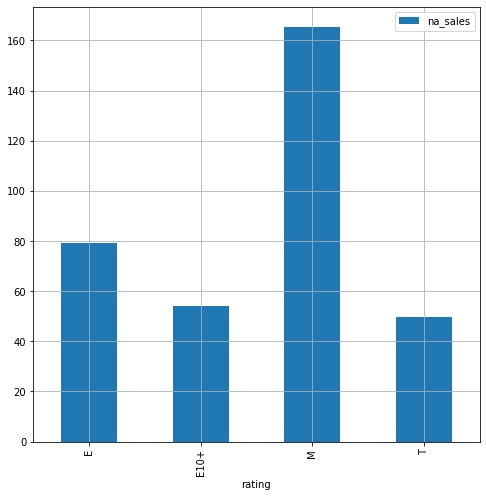

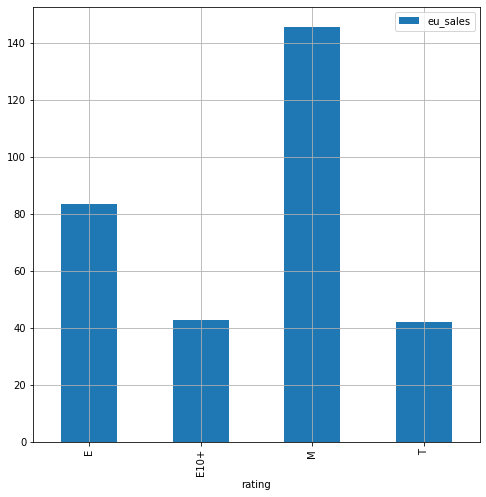

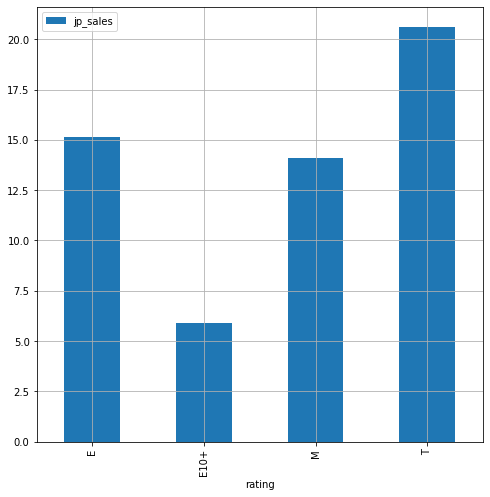

In [31]:
for region in region_sales:
    plotted_table = df_late.pivot_table(values = region, index = 'rating', aggfunc = 'sum')
    plotted_table.plot(kind = 'bar',figsize = (8,8), grid = True)

The answe is mixedr. The NA and EU once again show us a similar picture of the sales when grouped by ratings.
The western audience mostly buys games that are rated M (mature) or E (everyone).
The odd one out is once again JP, where the major income comes from selling games rated T (for teen) and the games rated M a just a little below E games.
When marketing games to JP audiences it would be wise to aim for more inclusive (young) ratings.

## Testing various hypotheses

We will now test to see if whetever a game is on PC on Xbox One affects the user rating in a signiciant way. The user rating is the only metric the shows the opinion of audience towards games, So it will be wise to see how well received or games in general on different platforms. 

    H0: Average user ratings of the Xbox One and PC platforms are the same.
    H1: Average user ratings of the Xbox One and PC platforms are different.

In [32]:
# Test the hypothesis
userratings_pc_x1 = st.ttest_ind(
                       df_late.query('platform == "PC" and user_score != 0')['user_score'],
                       df_late.query('platform == "XOne" and user_score != 0')['user_score'],
)

alpha = 0.05

print('p-value:',userratings_pc_x1.pvalue)

if (userratings_pc_x1.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.14012658403611647
We can't reject the null hypothesis


The p-value is above the 5% alpha we set,  which means that we can't reject the hypothesis of the means being equal. 
Maybe there are many games that are exclusive to PC and XOne, thus homogenizing the ratings (such as games from studios under Microsoft flag)? 
By switching the platforms in the queries one can easily pit different platforms in the same test. 

We will now test to see if whetever a game's genre (Action of Sports) affects the user rating in a signiciant way. The user rating is the only metric the shows the opinion of audience towards games, So it will be wise to see how well received or games in general on different genres. 

    H0: Average user ratings for the Action and Sports genres are the same.
    H1: Average user ratings for the Action and Sports genres are different.

In [33]:
# Test the hypothesis
userratings_act_sports = st.ttest_ind(
                       df_late.query('genre == "Action" and user_score != 0')['user_score'],
                       df_late.query('genre == "Sports" and user_score != 0')['user_score'],
)

alpha = 0.05

print('p-value:',userratings_act_sports.pvalue)

if (userratings_act_sports.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.0517832389140023e-27
We reject the null hypothesis


The p-value is very far below the 5% alpha we set,  which means the mean of user ratings of those two genres is not equal. Games from different genres are accepted differently among their playerbase, It may be wise to take to heart the desires of different genre playbases when releasing games for those different genres (for example, maybe graphics means less for Sports games players?).

## General Conclusion

Much can be said about the sales of different games, from different genres, on different platforms over different years.
Some important conclusions we came up with during the research include but are not limited to:
Critic and user scores factor very little into the sales of games, while region, platforms and genres factor strongly into the sales

Trends and patterns shouldn't be ignored. New platforms come and go in waves, with one's success partly riding on it's predecessor (been a while since Nintendo released a console since the 3DS/WiiU, one can only wonder what they have up their sleeve for 2017 to Switch things up).

When selling games, one must take into account the wants and needs of their audiences. Genres that are unpopular in the west might sweep the board in the east, and consoles that are piling up dust in the east are leading the charts in the west.
In the west you can't go wrong with a new Action or Shooter game, and in the east it will be easy to sell a new RPG.